In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv')

In [3]:
# Mengambil fitur yang akan digunakan untuk clustering
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Kasus_Sembuh_Akumulatif',
            'Kasus_Meninggal_Akumulatif', 'Kasus_Aktif_Akumulatif']

In [4]:
# Mengambil data terakhir untuk setiap provinsi
latest_data = df.sort_values('Tanggal').groupby('Provinsi').last().reset_index()

In [5]:
# Memilih fitur untuk clustering
X = latest_data[features]

In [6]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Mencari jumlah cluster optimal menggunakan elbow method
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

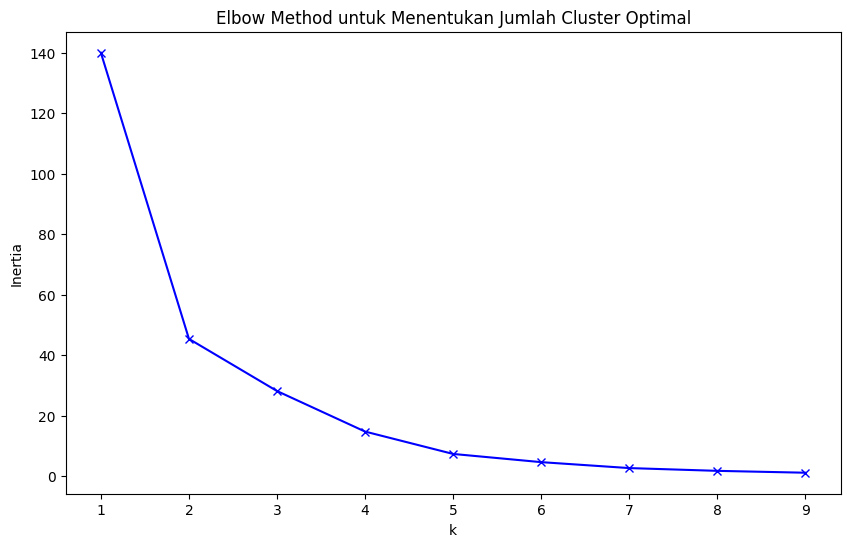

In [8]:
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [9]:
# Melakukan clustering dengan K-means (dengan 4 cluster sebagai contoh)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
# Menambahkan hasil clustering ke dataframe
latest_data['Cluster'] = clusters

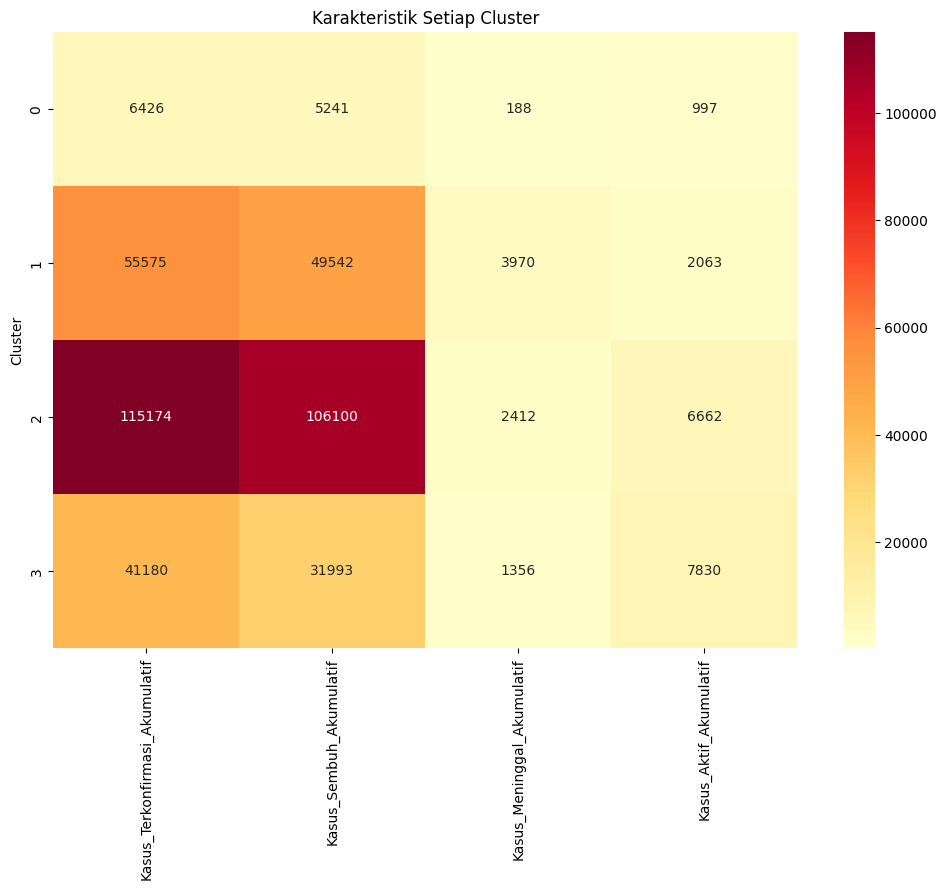

In [11]:
# Membuat heatmap untuk melihat karakteristik setiap cluster
plt.figure(figsize=(12, 8))
cluster_means = latest_data.groupby('Cluster')[features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('Karakteristik Setiap Cluster')
plt.show()

In [12]:
# Print hasil clustering
print("\nHasil Clustering per Provinsi:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    provinces = latest_data[latest_data['Cluster'] == cluster]['Provinsi'].tolist()
    for province in provinces:
        print(f"- {province}")


Hasil Clustering per Provinsi:

Cluster 0:
- Aceh
- Bali
- Banten
- Bengkulu
- Daerah Istimewa Yogyakarta
- Gorontalo
- Indonesia
- Jambi
- Kalimantan Barat
- Kalimantan Selatan
- Kalimantan Tengah
- Kalimantan Timur
- Kalimantan Utara
- Kepulauan Bangka Belitung
- Kepulauan Riau
- Lampung
- Maluku
- Maluku Utara
- Nusa Tenggara Barat
- Nusa Tenggara Timur
- Papua
- Papua Barat
- Riau
- Sulawesi Barat
- Sulawesi Selatan
- Sulawesi Tengah
- Sulawesi Tenggara
- Sulawesi Utara
- Sumatera Barat
- Sumatera Selatan
- Sumatera Utara

Cluster 1:
- Jawa Timur

Cluster 2:
- DKI Jakarta

Cluster 3:
- Jawa Barat
- Jawa Tengah


In [13]:
# Menampilkan statistik cluster
print("\nStatistik Cluster:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_stats = latest_data[latest_data['Cluster'] == cluster][features].describe()
    print(cluster_stats)


Statistik Cluster:

Cluster 0:
       Kasus_Terkonfirmasi_Akumulatif  Kasus_Sembuh_Akumulatif  \
count                       31.000000                31.000000   
mean                      6425.548387              5240.516129   
std                       5631.143826              4851.747636   
min                         10.000000                 0.000000   
25%                       1717.000000              1132.500000   
50%                       4615.000000              3568.000000   
75%                       9981.000000              7547.500000   
max                      19060.000000             17092.000000   

       Kasus_Meninggal_Akumulatif  Kasus_Aktif_Akumulatif  
count                   31.000000               31.000000  
mean                   188.322581              996.709677  
std                    179.521844              970.075090  
min                      0.000000               10.000000  
25%                     47.000000              319.000000  
50%          